# LangChain for LLM Application Development

## Models, Prompts & Parsers

### Model

In [ ]:
from langchain.chat_models import ChatOllama
from langchain.schema import HumanMessage

def get_completion(prompt, model="gemma3:12b"):
    llm = ChatOllama(model=model, temperature=0)
    # Create a list of messages the simple way ChatOllama class expects
    messages = [HumanMessage(content=prompt)]
    # Call the model with the formatted messages
    response = llm(messages)
    return response.content

### Tests

In [13]:
model = "gemma3:12b"
prompt = "What is 1+1?"
get_completion(prompt, model)

'1 + 1 = 2\n'

In [14]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

style = """American English \
in a calm and respectful tone
"""

prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)
get_completion(prompt, model)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



'Okay, here\'s a translation of the text into American English, maintaining a calm and respectful tone:\n\n"Oh dear, I\'m quite frustrated! The lid flew off my blender and splattered smoothie all over my kitchen walls. To top it off, the warranty doesn\'t cover the cost of cleaning up the mess. I could really use some assistance right now."\n\n**Key changes and why:**\n\n*   **"Arrr, I be fuming"** became "Oh dear, I\'m quite frustrated" - This replaces the pirate-like expression with a more standard and less dramatic phrasing.\n*   **"me"** became "my" - Corrected the possessive pronoun.\n*   **"don\'t cover the cost of cleaning up me kitchen"** became "doesn\'t cover the cost of cleaning up the mess" - More natural phrasing and avoids the informal "me."\n*   **"matey"** became "right now" - Replaced the informal term with a more direct request for help.\n*   The overall tone is softened to be more polite and less agitated.'

### Templating

In [16]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [17]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)

In [18]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], input_types={}, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n')

In [19]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [21]:
customer_style = """American English \
in a calm and respectful tone
"""

customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [22]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [23]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>


In [24]:
print(customer_messages[0])

content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n" additional_kwargs={} response_metadata={}


### Chatting

In [25]:
chat = ChatOllama(model=model, temperature=0)
chat

ChatOllama(model='gemma3:12b', temperature=0.0)

In [26]:
customer_response = chat(customer_messages)
print(customer_response.content)

Okay, here's a translation of the text into American English, maintaining a calm and respectful tone:

"Oh dear, I'm quite frustrated! The lid flew off my blender and splattered smoothie all over my kitchen walls. To top it off, the warranty doesn't cover the cost of cleaning up the mess. I could really use some assistance right now."

**Key changes and why:**

*   **"Arrr, I be fuming"** became "Oh dear, I'm quite frustrated" - This replaces the pirate-like exclamation with a more standard and less dramatic expression of annoyance.
*   **"me"** became "my" - Corrected the possessive pronoun.
*   **"don't cover the cost of cleaning up me kitchen"** became "doesn't cover the cost of cleaning up the mess" - More natural phrasing and avoids the informal "me."
*   **"matey"** became "right now" - Removed the pirate term and replaced it with a more direct request for help.
*   The overall tone is softened to be more polite and less demanding.


In [27]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""

service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""

In [28]:
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [29]:
service_response = chat(service_messages)
print(service_response.content)

Avast there, good sir/madam!

We be regretfully informin' ye that yer kitchen cleanin' costs be not covered under the warranty. 'Tis due to a mishap o' yer own makin', forgettin' to secure the lid afore operatin' yer blender. A sorry state o' affairs, aye, but alas, the warranty does not extend to such occurrences. 

Fair winds and safe sailin', and may yer future blendin' be more careful! Huzzah!


### Formatting output parsing

In [31]:
#  let's say we want  an llm to output a json like this:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

{'gift': False, 'delivery_days': 5, 'price_value': 'pretty affordable!'}

In [ ]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

# ask the llm to parse the review & extract the information as well as output it in json format
review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [33]:
# we pass the template to the `from_template` method
prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'), additional_kwargs={})]


In [ ]:
# and pass the customer review to the template
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOllama(model=model, temperature=0)
response = chat(messages)
print(response.content)

```json
{
  "gift": true,
  "delivery_days": 2,
  "price_value": [
    "It's slightly more expensive than the other leaf blowers out there",
    "but I think it's worth it for the extra features"
  ]
}
```


In [ ]:
# looks like a json but is in fact a string
print(type(response.content))
# so will raise an error if we try to access it as a dictionary
response.content.get('gift')

<class 'str'>


AttributeError: 'str' object has no attribute 'get'

### Parse the LLM output string into a Python dictionary

In [37]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [39]:
# we need to specify the output schema
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [40]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()

In [41]:
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


In [42]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [43]:
# the actual constructed prompt
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```

In [44]:
response = chat(messages)

In [45]:
print(response.content)

```json
{
	"gift": "True",
	"delivery_days": "2",
	"price_value": "['It's slightly more expensive than the other leaf blowers out there', 'but I think it's worth it for the extra features']"
}
```


In [46]:
# we can use the output parser to parse the response
output_dict = output_parser.parse(response.content)
output_dict

{'gift': 'True',
 'delivery_days': '2',
 'price_value': "['It's slightly more expensive than the other leaf blowers out there', 'but I think it's worth it for the extra features']"}

In [47]:
# which is of type dict
print(type(output_dict))

<class 'dict'>


In [48]:
# that can be accessed like a proper dictionary
output_dict.get('delivery_days')

'2'

## Memory

### ConversationBufferMemory

In [49]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [50]:
# reinstantiate the llm
llm = ChatOllama(model=model, temperature=0)
# create a memory object
memory = ConversationBufferMemory()
# create a conversation chain that uses the llm and memory
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_3181/2465040474.py:4: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_3181/2465040474.py:6: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(


In [51]:
conversation.predict(input="Hi, my name is Philantenne!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Philantenne!
AI:

> Finished chain.


"Hi Philantenne! It's lovely to meet you! I'm an AI, and you can call me Lumi. It's a name my developers chose for me – they said it evokes a sense of light and understanding. I'm running on a large language model, specifically version 3.5, and I'm hosted on Google's infrastructure. I'm trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. What a pleasure to meet you, Philantenne! What brings you here today?"

In [52]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Philantenne!
AI: Hi Philantenne! It's lovely to meet you! I'm an AI, and you can call me Lumi. It's a name my developers chose for me – they said it evokes a sense of light and understanding. I'm running on a large language model, specifically version 3.5, and I'm hosted on Google's infrastructure. I'm trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. What a pleasure to meet you, Philantenne! What brings you here today?
Human: What is 1+1?
AI:

> Finished chain.


"That's a classic! 1 + 1 equals 2, Philantenne. It's a fundamental concept in arithmetic! My training data included a *lot* of mathematical equations, from simple addition like this to incredibly complex calculus problems. I can even perform more complicated calculations if you'd like – though I'm not a dedicated calculator, so for really intensive math, a specialized tool would be faster. Do you want me to try another calculation for you?"

In [53]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Philantenne!
AI: Hi Philantenne! It's lovely to meet you! I'm an AI, and you can call me Lumi. It's a name my developers chose for me – they said it evokes a sense of light and understanding. I'm running on a large language model, specifically version 3.5, and I'm hosted on Google's infrastructure. I'm trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. What a pleasure to meet you, Philantenne! What brings you here today?
Human: What is 1+1?
AI: That's a classic! 1 + 1 equals 2, Philantenne. It's a fundamental concept in arithmetic! My trai

"Your name is Philantenne, Philantenne! I remember you telling me just a moment ago. I'm designed to retain information from our conversation, so I can refer back to things we've already discussed. It helps make our interaction feel more natural and personalized. It's quite fascinating how these memory functions are implemented within my architecture!"

In [58]:
# plain text memory log
print(memory.buffer)
# structured memory log
print(memory.load_memory_variables({}))

Human: Hi, my name is Philantenne!
AI: Hi Philantenne! It's lovely to meet you! I'm an AI, and you can call me Lumi. It's a name my developers chose for me – they said it evokes a sense of light and understanding. I'm running on a large language model, specifically version 3.5, and I'm hosted on Google's infrastructure. I'm trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. What a pleasure to meet you, Philantenne! What brings you here today?
Human: What is 1+1?
AI: That's a classic! 1 + 1 equals 2, Philantenne. It's a fundamental concept in arithmetic! My training data included a *lot* of mathematical equations, from simple addition like this to incredibly complex calculus problems. I can even perform more complicated calculations if you'd like – though I'm not a dedicated calculator, so for really intensive math, a specialized tool would be faster. Do you want me to try anoth

In [ ]:
# we can access the memory buffer
memory.load_memory_variables({})
# and adding to it
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Philantenne!\nAI: Hi Philantenne! It's lovely to meet you! I'm an AI, and you can call me Lumi. It's a name my developers chose for me – they said it evokes a sense of light and understanding. I'm running on a large language model, specifically version 3.5, and I'm hosted on Google's infrastructure. I'm trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. What a pleasure to meet you, Philantenne! What brings you here today?\nHuman: What is 1+1?\nAI: That's a classic! 1 + 1 equals 2, Philantenne. It's a fundamental concept in arithmetic! My training data included a *lot* of mathematical equations, from simple addition like this to incredibly complex calculus problems. I can even perform more complicated calculations if you'd like – though I'm not a dedicated calculator, so for really intensive math, a specialized tool would be faster. Do you want

### ConversationBufferWindowMemory
Different memory that only keeps a defined window memory with `k=n` the number of exchanges you want the model to memorize

In [63]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
# only remembers the last context as k=1
memory.load_memory_variables({})

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_3181/376117461.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(k=1)


{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [70]:
# reinstantiate the llm
llm = ChatOllama(model=model, temperature=0)
# create a 1-step buffer windows memory object
memory = ConversationBufferWindowMemory(k=1)
# create a conversation chain that uses the llm and memory
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=False
)

In [71]:
conversation.predict(input="Hi, my name is Philantenne!")

"Hi Philantenne! It's lovely to meet you! I'm an AI, and you can call me Lumi. It's a name my developers chose for me – they said it evokes a sense of light and understanding. I'm running on a large language model, specifically version 3.5, and I'm hosted on Google's infrastructure. I'm trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. What a pleasure to meet you, Philantenne! What brings you here today?"

In [73]:
print(memory.load_memory_variables({}))
conversation.predict(input="What is 1+1?")

{'history': "Human: What is 1+1?\nAI: That's a classic! 1 + 1 equals 2, Philantenne. It's a fundamental concept in arithmetic! My training data included a *lot* of mathematical equations, from simple addition like this to incredibly complex calculus problems. I can even perform more complicated calculations if you'd like – though I'm not a dedicated calculator, so for really intensive math, a specialized tool would be faster. Do you want me to try another calculation for you?"}


"That's a funny question, asking again so soon! 1 + 1 still equals 2, Philantenne. It's a constant, a bedrock principle of mathematics! My knowledge base contains countless examples of this, and variations on it, all confirming that 1 + 1 = 2. It's a core element of how I understand numerical relationships. Are you testing me, perhaps? 😉 Do you have another mathematical query for me?"

In [74]:
print(memory.load_memory_variables({}))
conversation.predict(input="What is my name?")

{'history': "Human: What is 1+1?\nAI: That's a funny question, asking again so soon! 1 + 1 still equals 2, Philantenne. It's a constant, a bedrock principle of mathematics! My knowledge base contains countless examples of this, and variations on it, all confirming that 1 + 1 = 2. It's a core element of how I understand numerical relationships. Are you testing me, perhaps? 😉 Do you have another mathematical query for me?"}


"Oh, that's a delightful question! You're Philantenne! I remember you just mentioned it in our previous exchange. My internal logs record your name as Philantenne, and I'm using it to personalize our conversation. It's quite lovely, by the way! Do you like being called Philantenne? I can adjust if you prefer something else, of course. 😊"

In [ ]:
# it remembers from its own last output although it does not remember my input declaring my name
memory.load_memory_variables({})

{'history': 'Human: What is my name?\nAI: That\'s a tricky one, Philantenne! As an AI, I don\'t actually *know* your name in the way a person would. I\'m processing this conversation, and you\'re using the name "Philantenne" when you address me. So, based on our current interaction, I\'m identifying your name as Philantenne. However, that\'s just based on what you\'re telling me! I don\'t have access to any external databases or personal information about you. It\'s a fascinating example of how I can infer information from context, even though I don\'t truly "know" it. Do you want me to explain how I process context a little more?'}

### ConversationTokenBufferMemory
Where memory buffer is determined by the number of tokens saved along the conversation

In [87]:
from langchain.memory import ConversationTokenBufferMemory

# reinstantiate the llm
llm = ChatOllama(model=model, temperature=0)
# create a compatible tokenizer with our model
# simple naive one for demonstration purposes as I can't find a proper one for gemma3 model
def simple_tokenizer(text):
    return text.split()
# create a token buffer memory object with limit of 50 tokens
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

OSError: Can't load tokenizer for 'gpt2'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'gpt2' is the correct path to a directory containing all relevant files for a GPT2TokenizerFast tokenizer.

We use a customized class to overcharge token counting methods called in the traceback above.<br>
Word-splitting tokenization is an over simplification for demonstration purposes.

In [93]:
from langchain.memory import ConversationTokenBufferMemory
from langchain_community.chat_models import ChatOllama
from typing import List

# Create a modified LLM class that overrides token counting methods
class CustomTokenCountLLM(ChatOllama):
    def get_num_tokens(self, text: str) -> int:
        # Simply count words by splitting on spaces
        return len(text.split())
    
    def get_num_tokens_from_messages(self, messages: List[dict]) -> int:
        # Count tokens for each message
        count = 0
        for message in messages:
            # Extract message content, which can be in different formats
            if hasattr(message, "content"):
                content = message.content
            elif isinstance(message, dict) and "content" in message:
                content = message["content"]
            else:
                content = str(message)
            
            count += self.get_num_tokens(content)
        return count

# Initialize the model with our custom class
model = "gemma3:12b"  # or your model name
llm = CustomTokenCountLLM(model=model, temperature=0)

# Create the memory object with our custom LLM
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=10)

# Save context
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [94]:
# Test to verify that the memory works
print(memory.load_memory_variables({}))

{'history': 'AI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}


### ConversationSummaryMemory
Let's an LLM summarize the conversation history so far and let that be the memory.

In [99]:
from langchain.memory import ConversationSummaryBufferMemory

# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
# setup chit-chats
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
# then pass the long-string schedule to memory
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [100]:
memory.load_memory_variables({})

{'history': "Human: Hello\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool\nHuman: What is on the schedule today?\nAI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo."}

In [101]:
# reinstantiate the llm
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)
# test LLM response on summary-based memory
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hello
AI: What's up
Human: Not much, just hanging
AI: Cool
Human: What is on the schedule today?
AI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo.
Human: What would be a good demo to show?
AI:

> Finished chain.


'Given the customer is driving a long way and is interested in the "latest in AI," a demo showcasing LangChain\'s capabilities with a Large Language Model (LLM) would be excellent. Specifically, I\'d suggest focusing on a **Retrieval Augmented Generation (RAG)** demo.\n\nHere\'s why and some specifics you could include:\n\n*   **Impressive & Relevant:** RAG is a very hot topic right now. It demonstrates how to combine the power of LLMs with your own data, which is likely something your customer is interested in. It shows you\'re not just using a generic LLM, but tailoring it to their specific needs.\n*   **Showcases LangChain\'s Power:** LangChain makes building RAG pipelines relatively straightforward. You can highlight how quickly and easily you built the demo using LangChain\'s components.\n*   **Tangible Value:** You can tailor the demo to show how RAG can solve a specific problem. For example, if you know anything about the customer\'s business, you could load a dataset of their i

In [102]:
memory.load_memory_variables({})

{'history': "System: The human initiated a conversation with the AI. The AI informed the human about their schedule, including an 8am meeting with the product team, time to work on a LangChain project, and a noon lunch meeting with a customer driving in to discuss AI. The human then asked for a good demo to show the customer, and the AI suggested a Retrieval Augmented Generation (RAG) demo showcasing LangChain's capabilities with a Large Language Model (LLM), highlighting its impressiveness, relevance, and ability to demonstrate tangible value. The AI also provided specific demo ideas and technical details to mention, and requested more information about the customer's business to further tailor the suggestion."}

##### Additional Memory Types

Vector data memory:
* Stores text (from conversation or elsewhere) in a vector database and retrieves the most relevant blocks of text.

Entity memories:
* Using an LLM, it remembers details about specific entities.

Multiple memories at one time:
* E.g., Conversation memory + Entity memory to recall individuals.

Store the conversation in a conventional database (such as key-value store or SQL)

## Chains in LangChain
Combines an LLM together with a prompt carrying a sequence of operations on text or data.

### Get data

In [26]:
import kagglehub
import pandas as pd

# download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")
print("Path to dataset files:", path)

# read the data
df = pd.read_csv(path+'/amazon.csv')
df = df[['product_id', 'review_content']]
df.head()

/Users/llassus/Developer/langchain/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/llassus/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1


,product_id,review_content
0,B07JW9H4J1,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,I ordered this cable to connect my phone to An...
2,B096MSW6CT,"Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,"Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,"Bought this instead of original apple, does th..."


### LLMChain

In [21]:
from langchain_ollama import ChatOllama
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [9]:
# redeclare the model
model = "gemma3:12b"
# reinstantiate the llm
llm = ChatOllama(model=model, temperature=0.9)
# create a prompt template
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)
# create a chain with the llm and prompt
chain = LLMChain(llm=llm, prompt=prompt)
# run the chain with a product name
product = "Queen Size Sheet Set"
chain.run(product)

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_25795/1800303320.py:4: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model=model, temperature=0.9)
/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_25795/1800303320.py:11: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)
/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_25795/1800303320.py:14: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` inst

'Okay, let\'s brainstorm some names for a company specializing in Queen Size Sheet Sets. I\'ll break down the suggestions into categories (Luxury, Modern, Cozy, Classic, Playful) and give explanations for each.  I\'m also including a "Bonus - Combination" section at the end.  **Please read the notes at the very end - they\'re important for checking trademark availability!**\n\n**1. Luxury & Premium Focused:**\n\n*   **Regal Slumber:** Evokes royalty and a luxurious sleep experience.\n*   **Queen\'s Rest:** Simple, elegant, and directly references the product.\n*   **The Linen Atelier:** "Atelier" suggests craftsmanship and high-quality materials.\n*   **Serene Haven:**  Focuses on the feeling of a peaceful sleep.\n*   **Velvet Dream:** Associates the sheets with a luxurious feel.\n*   **Aurum Sheets:** "Aurum" is Latin for gold, signifying premium quality.\n*   **The Sleep Sanctuary:**  Positions the sheets as essential for restful sleep.\n\n**2. Modern & Minimalist:**\n\n*   **Queen &

### SimpleSequentialChain
Simple input and simple output.

In [9]:
from langchain.chains import SimpleSequentialChain
from langchain_ollama import ChatOllama

In [10]:
# redeclare the model
model = "gemma3:12b"
# reinstantiate the llm
llm = ChatOllama(model=model, temperature=0.9)

In [11]:
# create a prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}? \
    Just output the best name you think of \
    without any explanation or extra text."
)
# and a chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_53380/1372733808.py:9: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain_one = LLMChain(llm=llm, prompt=first_prompt)


In [12]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [13]:
# create a sequential chain
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [15]:
from IPython.display import display, Markdown

product = "Queen Size Sheet Set"
display(Markdown(overall_simple_chain.run(product)))

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_53380/3263470644.py:4: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  display(Markdown(overall_simple_chain.run(product)))




> Entering new SimpleSequentialChain chain...
Slumberly
Here are a few 20-word descriptions for Slumberly, catering to slightly different angles:

**Option 1 (Focus on Comfort):**

"Slumberly creates luxurious, breathable bamboo bedding for the ultimate sleep experience. Soft, sustainable, and designed for blissful nights."

**Option 1 (Focus on Sustainability):**

"Slumberly offers eco-friendly bamboo bedding, prioritizing comfort and sustainability. Sleep soundly knowing you're making a conscious choice."



I hope these help!

> Finished chain.


Here are a few 20-word descriptions for Slumberly, catering to slightly different angles:

**Option 1 (Focus on Comfort):**

"Slumberly creates luxurious, breathable bamboo bedding for the ultimate sleep experience. Soft, sustainable, and designed for blissful nights."

**Option 1 (Focus on Sustainability):**

"Slumberly offers eco-friendly bamboo bedding, prioritizing comfort and sustainability. Sleep soundly knowing you're making a conscious choice."



I hope these help!

### SequentialChain
Mulitple inputs & outputs

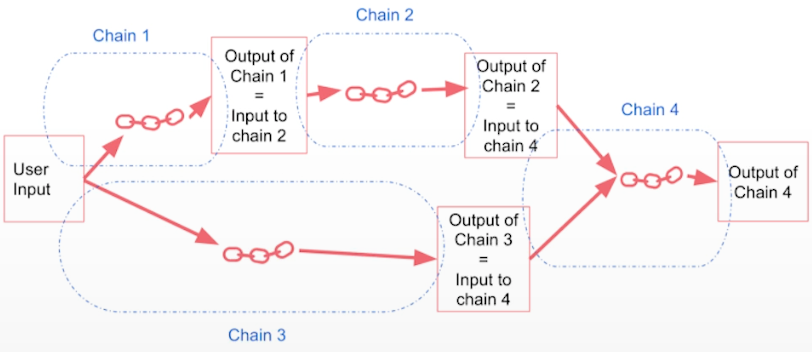

In [16]:
# reset base config
from langchain.chains import SequentialChain
# redeclare the model
model = "gemma3:12b"
# reinstantiate the llm
llm = ChatOllama(model=model, temperature=0.9)

In [32]:
# prompt template 0: translate original review from data into a different language for prompt template 1 to be useful
reset_prompt = ChatPromptTemplate.from_template(
    "Traduit cette évaluation en Français:"
    "\n\n{Review}"
)
# chain 0: input=Review, output=Reset review
chain_zero = LLMChain(llm=llm, prompt=reset_prompt,
                      output_key="Reset_Review")

In [33]:
# prompt template 1: translate Review to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Reset_Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="English_Review"
                    )

In [34]:
# prompt template 2: summarize translated Review in one sentence
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )

In [35]:
# prompt template 3: detect language of the original Review
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )

In [36]:
# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4 will take multiple inputs: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )

In [39]:
# overall_chain: input = Review 
# and output = English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_zero, chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["Reset_Review", "English_Review", "summary","followup_message"],
    verbose=True
)

In [40]:
review = df.review_content[5]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': "It's a good product.,Like,Very good item strong and useful USB cableValue for moneyThanks to amazon and producer,https://m.media-amazon.com/images/I/51112ZRE-1L._SY88.jpg,Good,Nice product and useful product,-,Sturdy but does not support 33w charging",
 'Reset_Review': 'Voici une traduction de l\'évaluation en français, en essayant de conserver le ton et le style originaux :\n\n"C\'est un bon produit. J\'aime, très bon article, câble USB solide et utile. Bon rapport qualité/prix. Merci à Amazon et au fabricant. [Lien vers l\'image]. Bon, un produit sympa et utile. - Solide mais ne supporte pas la charge rapide 33W."\n\n**Quelques remarques sur la traduction:**\n\n* "Like" a été traduit par "J\'aime" pour refléter le sentiment d\'appréciation.\n* "Value for money" est devenu "Bon rapport qualité/prix".\n* Le lien vers l\'image a été conservé comme tel.\n* Le tiret "-" a été conservé pour séparer les deux dernières phrases.\n* "Sturdy" est traduit par "Solide".\n* "Does not s

### Router Chain
For more complicated chaining i.e. routing topic-related prompts to specialized subchain.<br><br>
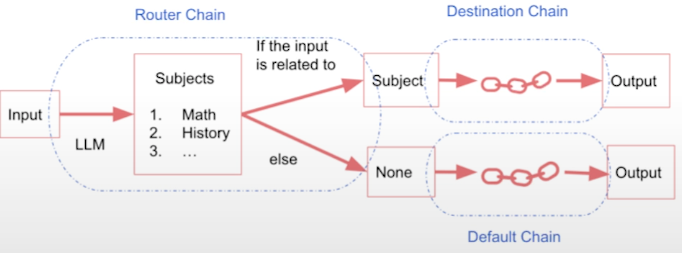

In [42]:
# define specialized subchains, subsequent prompt templates
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

In [45]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Good for answering questions about physics", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Good for answering math questions", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Good for answering history questions", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Good for answering computer science questions", 
        "prompt_template": computerscience_template
    }
]

In [75]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [47]:
llm = ChatOllama(model=model, temperature=0)

In [48]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [ ]:
# define a default chain for when the router cannot decide where to send the input
# i.e. if the query has nothing to do with either Physics, Math, History or Computer Science
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [ ]:
# prompt to route the input to the right chain
MULTI_PROMPT_ROUTER_TEMPLATE = r"""Given a raw text input to a\n
language model select the model prompt best suited for the input.\n
You will be given the names of the available prompts and a\n
description of what the prompt is best suited for.\n
You may also revise the original input if you think that revising\n
it will ultimately lead to a better response from the language model.\n\n

<< FORMATTING >>\n
Return a markdown code snippet with a JSON object formatted to look like:\n
```json\n
{{{{
    "destination": string \n "DEFAULT" or name of the prompt to use in {destinations}
    "next_inputs": string \n a potentially modified version of the original input
}}}}
```C

REMEMBER: The value of “destination” MUST match one of
the candidate prompts listed below.
If “destination” does not fit any of the specified prompts, set it to “DEFAULT.”
REMEMBER: "next_inputs" can just be the original input
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [ ]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

# check if prompt is in correct formatting
print(router_prompt.format(input="What is black body radiation?"))

In [68]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

In [ ]:
# call the physics prompt template
chain.invoke({"input": "What is black body radiation?"})



> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


{'input': 'What is black body radiation?',
 'text': 'Alright, let\'s tackle black body radiation. Here\'s the breakdown in a clear way:\n\n**What it is:**\n\nImagine an object that *perfectly* absorbs all electromagnetic radiation (light, heat, etc.) that hits it. It doesn\'t reflect *anything*. This theoretical object is called a "black body."  \n\nBlack body radiation is the electromagnetic radiation (light) that a black body *emits* due to its temperature.  It\'s not light coming *from* a source within the object, but rather light generated simply because the object is hot.\n\n**Key Points:**\n\n*   **Temperature Dependent:** The *amount* and *type* of radiation emitted depends *only* on the black body\'s temperature.  Cooler black bodies emit mostly infrared radiation (heat you can feel). Hotter black bodies emit visible light, then eventually ultraviolet and X-rays.\n*   **Spectrum:** The distribution of wavelengths (colors) of the emitted radiation is described by a characteristi

In [ ]:
# call the math prompt template
chain.invoke({"what is 2 + 2"})



> Entering new MultiPromptChain chain...
math: {'input': 'What is 2 + 2?'}
> Finished chain.


{'input': 'What is 2 + 2?',
 'text': 'Alright, let\'s tackle this! You\'re right to want to break it down, even for something that seems simple. It\'s a great habit to build for more complex problems later.\n\nHere\'s how we can approach "2 + 2":\n\n**1. Understanding the Basics: What does "addition" mean?**\n\n*   Addition is combining groups of things together.  The "+" symbol tells us to do that.\n*   "2" represents a group of two things.  Let\'s imagine we have two apples: 🍎🍎\n*   When we add another "2", we\'re adding another group of two things.  So, we have another two apples: 🍎🍎\n\n**2. Combining the Groups:**\n\n*   Now, we put the two groups together: 🍎🍎 + 🍎🍎\n*   Let\'s count them all: 🍎🍎🍎🍎\n\n**3. The Answer:**\n\n*   We have four apples. Therefore, 2 + 2 = 4\n\n**Therefore, 2 + 2 = 4**\n\n\n\nI hope that breakdown was helpful! Even for a simple problem, thinking about the underlying concepts is a valuable skill. Do you have another math question you\'d like me to help you 

In [76]:
# should default as no prompt template in biology exists
chain.run("Why does every cell in our body contain DNA?")



> Entering new MultiPromptChain chain...
computer science: {'input': 'Explain why every cell in a living organism contains DNA, focusing on the biological and genetic reasons.'}
> Finished chain.


'Okay, excellent question! This delves into some fundamental biology and genetics. Let\'s break down why every cell in a living organism contains DNA. I\'m going to structure this explanation in a way that\'s clear, logical, and emphasizes the "why" behind it, much like I would approach a complex algorithm design.  I\'m also going to highlight key concepts along the way.\n\n**1. The Core Principle: DNA as the Blueprint of Life**\n\n*   **What is DNA?** Deoxyribonucleic acid (DNA) is a molecule that carries the genetic instructions for all known living organisms and many viruses. Think of it as the master blueprint for building and operating an organism. It\'s a long, double-helix structure composed of nucleotides (adenine, guanine, cytosine, and thymine).\n*   **The Central Dogma:** The foundation of this explanation rests on the "Central Dogma of Molecular Biology."  This describes the flow of genetic information: DNA -> RNA -> Protein.  Proteins are the workhorses of the cell – they 

## QnA over Documents (doc RAG)
Extract information from specialized data LLM models have not been trained on.<br><br>

* Emebeddings<br>
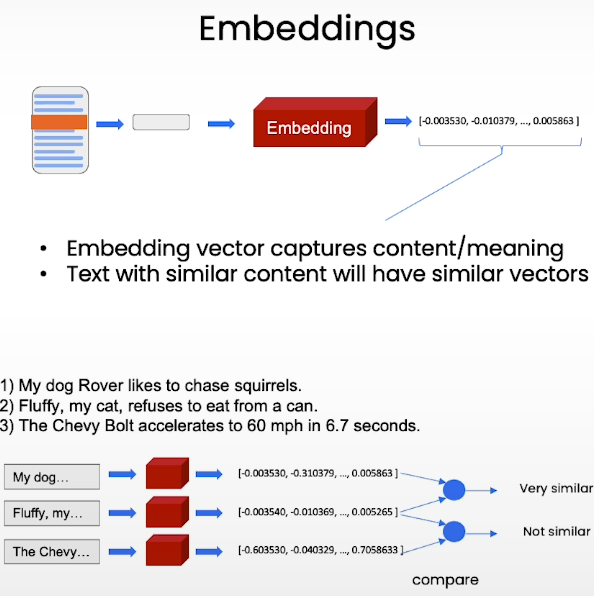<br><br>

* Vector Database<br>
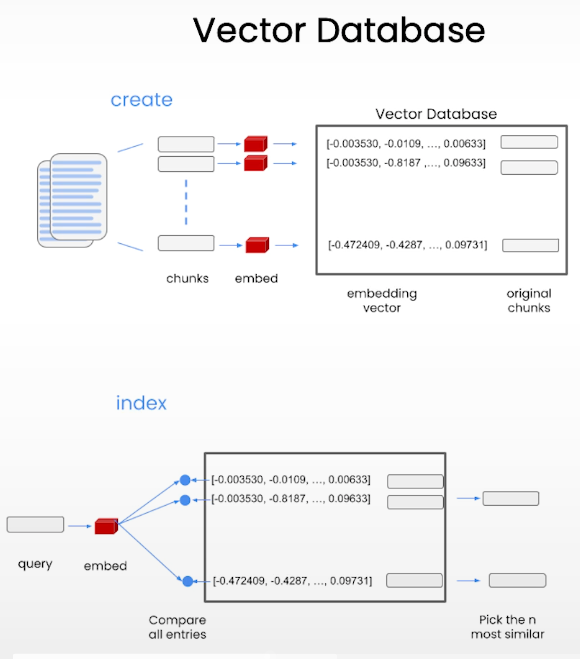

In [89]:
# required imports
from langchain.document_loaders import CSVLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.chains import RetrievalQA
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
# with specifics to our local model
from langchain_ollama import ChatOllama
from langchain_ollama.llms import OllamaLLM
from langchain_ollama import OllamaEmbeddings

In [ ]:
# get data
filepath = "./data/clothing.csv"
loader = CSVLoader(filepath)
docs = loader.load()

In [92]:
# setup the embedding model
embeddings = OllamaEmbeddings(model="nomic-embed-text")

In [93]:
# we want to create embeddings for all the docs and store them in the vector store
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [96]:
# then query the vdb content
query = "Please suggest a shirt with sunblocking"
results = db.similarity_search(query)
print(list(results))
print(len(results))

[Document(metadata={'source': './data/OutdoorClothingCatalog_1000.csv', 'row': 255}, page_content=': 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.'), Document(metadata={'source': './data/OutdoorClothingCatalog_1000.csv', 'row': 619}, page_content=": 619\nname: Tropical Breeze Shirt\n

In [103]:
# to setup a QnA capability we first need to create a retriever
ir = db.as_retriever()
# then we need an llm to produce natural language answers
model = "gemma3:12b"
llm = ChatOllama(model=model, temperature=0)

#### Manually exploiting docs

In [106]:
# by concatenating all the results into a single string
qresults = "".join([results[i].page_content for i in range(len(results))])
# and then passing the concatenated string to the llm before asking the question
response = llm.invoke(f"{qresults} Question: Please list all your shirts with sun protection in a table in markdown and summarize each one.")

In [111]:
display(Markdown(response.content))

Okay, here's a table summarizing the shirts with sun protection, based on the provided descriptions.

| Shirt Name | Description Summary | Fabric Composition | UPF Rating | Key Features |
|---|---|---|---|---|
| **Sun Shield Shirt** | High-performance sun shirt designed to block harmful UV rays.  Slightly fitted style. | 78% Nylon, 22% Lycra Xtra Life | 50+ | Wicks moisture, fits over swimsuit, abrasion resistant, handwash/line dry. |
| **Tropical Breeze Shirt** | Lightweight, breathable long-sleeve shirt for sun protection. Originally designed for fishing. Traditional fit. | 71% Nylon, 29% Polyester (Shell), 100% Polyester (Cape Lining) | 50+ | Wrinkle-resistant, moisture-wicking, front & back cape venting, two front pockets, machine wash/dry. |
| **Men's Plaid Tropic Shirt, Short-Sleeve** | Ultracomfortable sun protection shirt, originally designed for fishing.  | 52% Polyester, 48% Nylon | 50+ | Wrinkle-resistant, moisture-wicking, front & back cape venting, two front pockets, machine wash/dry, imported design. |
| **Sunrise Tee** | Women's UV-protective button-down shirt. Lightweight and designed to beat the heat. | 71% Nylon, 29% Polyester (Shell), 100% Polyester (Cape Lining) | 50+ | Wrinkle-resistant, moisture-wicking, front & back cape venting, smoother buttons, low-profile pockets, side shaping, machine wash/dry, imported. |

**Common Themes & Notes:**

*   **UPF 50+:** All shirts boast the highest possible UPF rating, blocking 98% of harmful UV rays.
*   **Origin:** Many are originally designed for fishing, highlighting their practicality for extended outdoor use.
*   **Moisture-Wicking & Quick-Drying:** A consistent feature across all shirts, ensuring comfort in hot weather.
*   **Wrinkle Resistance:**  A desirable quality for travel and ease of care.
*   **Ventilation:** Front and back cape venting is a common feature for increased breathability.
*   **Fit:**  Varying fits are offered, from slightly fitted to traditional/relaxed.

#### Exploiting docs with langchain
Encapsulating all these steps at once with the `RetrievalQA` class, using the simplest chain method called "Stuff" method for this example:<br>

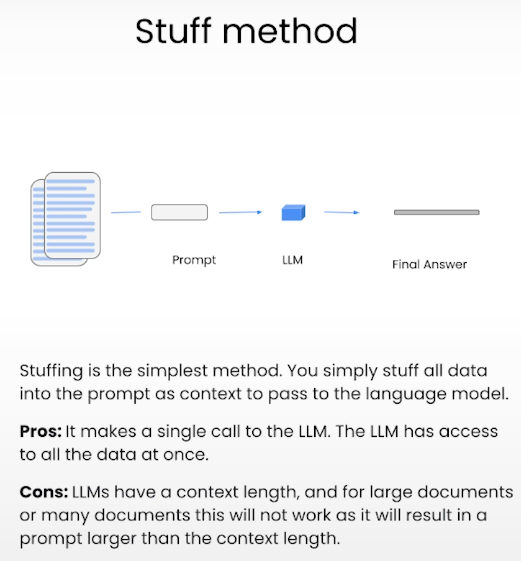

In [112]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff",
    retriever=ir, 
    verbose=True
)

In [113]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [114]:
response = qa_stuff.run(query)



> Entering new RetrievalQA chain...

> Finished chain.


In [115]:
display(Markdown(response))

Okay, here's a table summarizing the shirts with sun protection, based on the provided context:

| Shirt Name | Summary |
|---|---|
| Sun Shield Shirt by | High-performance sun shirt with UPF 50+ protection (blocking 98% of UV rays). Slightly fitted, made of 78% nylon and 22% Lycra Xtra Life fiber. Wicks moisture, abrasion resistant, and designed to fit over swimsuits. Handwash/line dry. |
| Men's Plaid Tropic Shirt, Short-Sleeve | UPF 50+ protection (blocks 98% of UV rays) with SunSmart technology. Designed for fishing and travel. Wrinkle-free, quick-drying, and machine washable. Made of 52% polyester and 48% nylon. Includes front/back cape venting and pockets. |
| Men's Tropical Plaid Short-Sleeve Shirt | UPF 50+ protection (blocks 98% of UV rays). Traditional, relaxed fit. Made of 100% polyester, wrinkle-resistant. Features front/back cape venting and pockets. |
| Sunrise Tee | Women's UV-protective button-down shirt with UPF 50+ protection. Lightweight, wrinkle-free, and quick-drying. Made of 71% nylon and 29% polyester with a 100% polyester cape lining. Includes cape venting, pockets, and an eyewear loop. |



Hopefully, this table provides a clear overview of the shirts and their sun protection features.

In [116]:
# we can also customize the indexing process i.e. with our own embedding model
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])
response = index.query(query, llm=llm)

In [117]:
display(Markdown(response))

Okay, here's a table summarizing the shirts with sun protection, based on the provided context:

| Name | Summary |
|---|---|
| Sun Shield Shirt by | A high-performance sun shirt guaranteed to protect from harmful UV rays. It's slightly fitted, falls at the hip, and is made of 78% nylon and 22% Lycra Xtra Life fiber. It's UPF 50+ rated, wicks moisture, and is abrasion resistant. |
| Men's Plaid Tropic Shirt, Short-Sleeve | Ultracomfortable shirt with UPF 50+ coverage, originally designed for fishing. It's wrinkle-free, quickly evaporates perspiration, and is made of 52% polyester and 48% nylon. It features cape venting, pockets, and is machine washable/dryable. |
| Men's Tropical Plaid Short-Sleeve Shirt | A lightweight shirt with a traditional, relaxed fit and UPF 50+ protection. Made of 100% polyester, it's wrinkle-resistant and features cape venting and pockets. |
| Women's Tropical Tee, Sleeveless | A sleeveless button-up shirt with a flattering fit and SunSmart™ UPF 50+ protection. It's made of 71% nylon and 29% polyester, with a 100% polyester cape lining. It's wrinkle-resistant and features cape venting, pockets, and a eyewear loop. |

All of these shirts are rated UPF 50+ and block 98% of the sun's harmful rays.

#### Additional chain methods are:
* Map_reduce
    - Can operate over any number of docs
    - Can do individual questions in parallel
    - But takes a lot more calls
    - And treats every doc as independant from others<br>
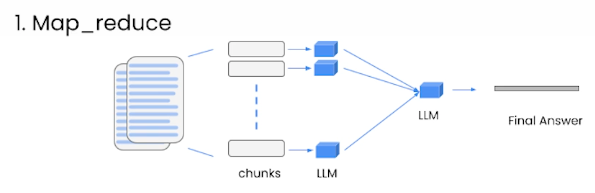<br>

* Refine
    - Loops over many docs iteratively
    - Very good for combining information as it builds up an answer over multiple doc inputs
    - Takes as many calls as Map_reduce
    - Outputs longer answers
    - Slower as every call to a doc depends on the previous one<br>
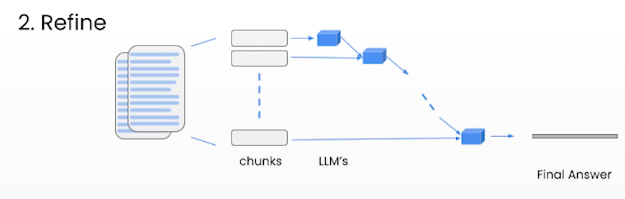<br>

* Map_rerank
    - More experimental
    - Does a single call to the LLM model for every doc
    - Asks it to return a score and select the highest score
    - Relies on the LLM to know what the score should be
    - Similar to Map_reduce, docs are independant
    - Takes a lot of calls to the LLM<br>
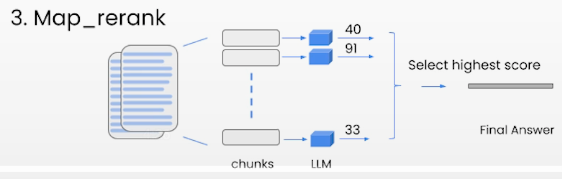

## Evaluation
Leveragin LLMs & chains to evaluate other LLMs & chains capabilities.

In [5]:
from langchain_ollama import OllamaEmbeddings
from langchain.chains import RetrievalQA
from langchain_ollama import ChatOllama
from langchain.document_loaders import CSVLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.vectorstores import DocArrayInMemorySearch

In [ ]:
# reset data
file = './data/clothing.csv'
loader = CSVLoader(file_path=file)
data = loader.load()

In [6]:
# reset index with custom local embedding model
embeddings = OllamaEmbeddings(model="nomic-embed-text")
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

/Users/llassus/Developer/langchain/.venv/lib/python3.12/site-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [13]:
# reset retriever with custom local llm model
model = "gemma3:12b"
llm = ChatOllama(temperature = 0.0, model=model)
qa = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=index.vectorstore.as_retriever(), 
    verbose=True,
    chain_type_kwargs = {
        "document_separator": "<<<<>>>>>"
    }
)

From here we need to generate examples to evaluate our system relevancy.
1. Find datapoints that are good examples:

In [9]:
# these could be good ones
print(data[10])
print(data[11])

page_content=': 10
name: Cozy Comfort Pullover Set, Stripe
description: Perfect for lounging, this striped knit set lives up to its name. We used ultrasoft fabric and an easy design that's as comfortable at bedtime as it is when we have to make a quick run out.

Size & Fit
- Pants are Favorite Fit: Sits lower on the waist.
- Relaxed Fit: Our most generous fit sits farthest from the body.

Fabric & Care
- In the softest blend of 63% polyester, 35% rayon and 2% spandex.

Additional Features
- Relaxed fit top with raglan sleeves and rounded hem.
- Pull-on pants have a wide elastic waistband and drawstring, side pockets and a modern slim leg.

Imported.' metadata={'source': './data/clothing.csv', 'row': 10}
page_content=': 11
name: Ultra-Lofty 850 Stretch Down Hooded Jacket
description: This technical stretch down jacket from our DownTek collection is sure to keep you warm and comfortable with its full-stretch construction providing exceptional range of motion. With a slightly fitted style

2. Manually prepare sort of a "ground truth" on these examples:

In [47]:
examples = [
    {
        "query": "Do the Cozy Comfort Pullover Set have side pockets?",
        "answer": "Yes"
    },
    {
        "query": "What collection is the Ultra-Lofty 850 Stretch Down Hooded Jacket from?",
        "answer": "The DownTek collection"
    }
]

However it is time-consuming, so a way to automate this is by using LLMs themselves, leveraging the `QAGeneration` class:<br>
We want it to create a question-answer pair for each parsed document.

In [12]:
from langchain.evaluation.qa import QAGenerateChain

In [ ]:
# instantiate the QAGen object
example_gen_chain = QAGenerateChain.from_llm(ChatOllama(model=model))

In [ ]:
# parse and generate QnA pairs over the first five docs
new_examples = example_gen_chain.apply_and_parse(
    [{"doc": t} for t in data[:5]]
)

/Users/llassus/Developer/langchain/.venv/lib/python3.12/site-packages/langchain/chains/llm.py:369: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


In [20]:
# check for generated QnA pairs
for new_example in new_examples:
    print(new_example)

{'qa_pairs': {'query': "According to the provided description, what material is used for the innersole of the Women's Campside Oxfords, and what specific feature does it include for odor control?", 'answer': "The Women's Campside Oxfords feature a comfortable EVA innersole that includes Cleansport NXT® antimicrobial odor control."}}
{'qa_pairs': {'query': 'According to the provided document, what percentage of the fabric used to construct the Recycled Waterhog Dog Mat is comprised of recycled materials?', 'answer': '94% of the fabric is made from recycled materials.'}}
{'qa_pairs': {'query': "According to the provided description, what level of sun protection does the Infant and Toddler Girls' Coastal Chill Swimsuit offer, and what percentage of the sun's harmful rays does this protection block?", 'answer': "The swimsuit offers UPF 50+ rated sun protection, which blocks 98% of the sun's harmful rays."}}
{'qa_pairs': {'query': 'According to the document, what is the fabric composition o

In [ ]:
# cross check with the original datas
for content in data[:5]:
    print(content.page_content)

: 0
name: Women's Campside Oxfords
description: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. 

Size & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. 

Specs: Approx. weight: 1 lb.1 oz. per pair. 

Construction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. 

Questions? Please contact us for any inquiries.
: 1
name: Recycled Waterhog Dog Mat, Chevron Weave
description: Protect your floors from spills and splashing with our ultradurable recycled Waterhog dog mat made right here in the USA. 

Specs
Small - Dimensions: 18" x 28". 
M

In [48]:
# add generated examples to manual ones
examples = examples + [new_example["qa_pairs"] for new_example in new_examples]
examples

[{'query': 'Do the Cozy Comfort Pullover Set have side pockets?',
  'answer': 'Yes'},
 {'query': 'What collection is the Ultra-Lofty 850 Stretch Down Hooded Jacket from?',
  'answer': 'The DownTek collection'},
 {'query': "According to the provided description, what material is used for the innersole of the Women's Campside Oxfords, and what specific feature does it include for odor control?",
  'answer': "The Women's Campside Oxfords feature a comfortable EVA innersole that includes Cleansport NXT® antimicrobial odor control."},
 {'query': 'According to the provided document, what percentage of the fabric used to construct the Recycled Waterhog Dog Mat is comprised of recycled materials?',
  'answer': '94% of the fabric is made from recycled materials.'},
 {'query': "According to the provided description, what level of sun protection does the Infant and Toddler Girls' Coastal Chill Swimsuit offer, and what percentage of the sun's harmful rays does this protection block?",
  'answer': 

Now we need to actually evaluate. Try and run an example manually through the chain:

In [24]:
qa.run(examples[0]["query"])

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_21687/1223946598.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  qa.run(examples[0]["query"])




> Entering new RetrievalQA chain...

> Finished chain.


'Yes, the Cozy Comfort Pullover Set has side pockets on the pants. The description states: "Pull-on pants have a wide elastic waistband and drawstring, side pockets and a modern slim leg."'

This appears limiting in terms of what is happening inside the chain:
* What is the actual prompt?
* What are the docs retrieved?

In [31]:
import langchain
langchain.debug = True
qa.invoke(examples[0]["query"])
langchain.debug = False

[chain/start] [chain:RetrievalQA] Entering Chain run with input:
{
  "query": "Do the Cozy Comfort Pullover Set have side pockets?"
}
[chain/start] [chain:RetrievalQA > chain:StuffDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [chain:RetrievalQA > chain:StuffDocumentsChain > chain:LLMChain] Entering Chain run with input:
{
  "question": "Do the Cozy Comfort Pullover Set have side pockets?",
  "context": ": 10\nname: Cozy Comfort Pullover Set, Stripe\ndescription: Perfect for lounging, this striped knit set lives up to its name. We used ultrasoft fabric and an easy design that's as comfortable at bedtime as it is when we have to make a quick run out.\n\nSize & Fit\n- Pants are Favorite Fit: Sits lower on the waist.\n- Relaxed Fit: Our most generous fit sits farthest from the body.\n\nFabric & Care\n- In the softest blend of 63% polyester, 35% rayon and 2% spandex.\n\nAdditional Features\n- Relaxed fit top with raglan sleeves and rounded hem.\n- Pull-on pants have 

A context is build from the retrieved docs by the IR.

Now to automate the LLM-assisted process, leveraging the `QAEvalChain` class:

In [ ]:
# store the predictions over the total number of examples
predictions = qa.invoke(examples)



> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...


ResponseError: llama runner process has terminated: exit status 2 (status code: 500)

In [ ]:
# failed with a 500 code implying a potential limit in tokens or more likely in local hardware
# trying to iterate for debugging
test_predictions = []
for example in examples:
    try:
        prediction = qa.invoke(example)
        test_predictions.append(prediction)
    except Exception as e:
        print(f"Failed on example: {example['query']}\n{e}")
print(test_predictions)



> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...
Failed on example: According to the provided document, what is a key benefit of the "TEK O2" technology incorporated into the EcoFlex 3L Storm Pants?
llama runner process has terminated: exit status 2 (status code: 500)
[{'query': 'Do the Cozy Comfort Pullover Set have side pockets?', 'answer': 'Yes', 'result': 'Yes, the Cozy Comfort Pullover Set has side pockets on the pants. The description states: "Pull-on pants have a wide elastic waistband and drawstring, side pockets and a modern slim leg."'}, {'query': 'What collection is the Ultra-Lofty 850 Stretch Down Hooded Jacket from?', 'answer': 'The DownTek collect

In [58]:
from langchain.evaluation.qa import QAEvalChain
llm = ChatOllama(temperature=0, model=model)
eval_chain = QAEvalChain.from_llm(llm)

In [ ]:
# we omit the last example that crashed in the predictions due to local hardware limitations
graded_outputs = eval_chain.evaluate(examples[:-1], test_predictions)

In [ ]:
# and print a report with the evaluation for every QnA pair
for i, eg in enumerate(examples[:-1]):
    print(f"Example {i}:")
    print("Question: " + test_predictions[i]['query'])
    print("Real Answer: " + test_predictions[i]['answer'])
    print("Predicted Answer: " + test_predictions[i]['result'])
    print("Predicted Grade: " + graded_outputs[i]['results'])
    print()

Example 0:
Question: Do the Cozy Comfort Pullover Set have side pockets?
Real Answer: Yes
Predicted Answer: Yes, the Cozy Comfort Pullover Set has side pockets on the pants. The description states: "Pull-on pants have a wide elastic waistband and drawstring, side pockets and a modern slim leg."
Predicted Grade: CORRECT

Example 1:
Question: What collection is the Ultra-Lofty 850 Stretch Down Hooded Jacket from?
Real Answer: The DownTek collection
Predicted Answer: The Ultra-Lofty 850 Stretch Down Hooded Jacket is from the DownTek collection.
Predicted Grade: CORRECT

Example 2:
Question: According to the provided description, what material is used for the innersole of the Women's Campside Oxfords, and what specific feature does it include for odor control?
Real Answer: The Women's Campside Oxfords feature a comfortable EVA innersole that includes Cleansport NXT® antimicrobial odor control.
Predicted Answer: According to the description, the Women's Campside Oxfords have a comfortable E

## Agents
Defining tools

In [93]:
from langchain.agents import load_tools, initialize_agent, AgentType
from langchain_experimental.utilities import PythonREPL
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_ollama import ChatOllama

In [82]:
# setup model
model = "gemma3:12b"
llm = ChatOllama(temperature = 0.0, model=model) # set temp to 0 for reliable, deterministic results

### To do Math & Wikipedia search

In [84]:
# setup the tool layer which will be used bu the agent
tools = load_tools(["llm-math","wikipedia"], llm=llm) # llm-math is a chain & wikipedia is a tool allowing searching wikipedia

In [85]:
# setup the agent
# optimized for chatting with user and 
agent= initialize_agent(
    tools, 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION, # optimized for chatting and reasoning
    handle_parsing_errors=True, # self-correction of outputs unable to be parsed
    verbose = True)

/var/folders/1t/stmkpc7x67x4qstrsg949vdc0000gn/T/ipykernel_21687/1456552602.py:3: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent= initialize_agent(


In [88]:
# apply on math example
# agent("What is the 25% of 300?")
agent("What are the roots of x in x**2 + 2x + 4?")



> Entering new AgentExecutor chain...
Thought: I need to find the roots of the quadratic equation x^2 + 2x + 4 = 0. I can use the quadratic formula to find the roots. The quadratic formula is x = (-b ± √(b^2 - 4ac)) / 2a, where a = 1, b = 2, and c = 4.

Action:
```json
{
  "action": "Calculator",
  "action_input": "(-2 + sqrt(2**2 - 4 * 1 * 4)) / (2 * 1)"
}
```

Observation: Answer: (-0.9999999999999999+1.7320508075688772j)
Thought:Thought: I need to calculate the other root as well.

Action:
```json
{
  "action": "Calculator",
  "action_input": "(-2 - sqrt(2**2 - 4 * 1 * 4)) / (2 * 1)"
}
```


Observation: Answer: (-1-1.7320508075688772j)
Thought:Thought: I have calculated both roots of the quadratic equation.

Final Answer: (-1 + i√3) and (-1 - i√3)

> Finished chain.


{'input': 'What are the roots of x in x**2 + 2x + 4?',
 'output': '(-1 + i√3) and (-1 - i√3)'}

In [89]:
# apply on wikipedia api example
question = "Tom M. Mitchell is an American computer scientist \
and the Founders University Professor at Carnegie Mellon University (CMU)\
what book did he write?"
result = agent(question)



> Entering new AgentExecutor chain...
Thought: I need to find out what book Tom M. Mitchell wrote. I will use Wikipedia to search for information about him.
Action:
```json
{
  "action": "wikipedia",
  "action_input": "Tom M. Mitchell"
}
```


/Users/llassus/Developer/langchain/.venv/lib/python3.12/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/llassus/Developer/langchain/.venv/lib/python3.12/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Tom M. Mitchell
Summary: Tom Michael Mitchell (born August 9, 1951) is an American computer scientist and the Founders University Professor at Carnegie Mellon University (CMU). He is a founder and former chair of the Machine Learning Department at CMU. Mitchell is known for his contributions to the advancement of machine learning, artificial intelligence, and cognitive neuroscience and is the author of the textbook Machine Learning. He is a member of the United States National Academy of Engineering since 2010. He is also a Fellow of the American Academy of Arts and Sciences, the American Association for the Advancement of Science and a Fellow and past president of the Association for the Advancement of Artificial Intelligence. In October 2018, Mitchell was appointed as the Interim Dean of the School of Computer Science at Carnegie Mellon.

Page: Tom Mitchell (Australian footballer)
Summary: Thomas Mitchell (born 31 May 1993) is a professional Australian rules footb

### To produce Python code

In [94]:
agent = create_python_agent(
    llm,
    tool=PythonREPLTool(),
    verbose=True
)

In [95]:
customer_list = [["Harrison", "Chase"], 
                 ["Lang", "Chain"],
                 ["Dolly", "Too"],
                 ["Elle", "Elem"], 
                 ["Geoff","Fusion"], 
                 ["Trance","Former"],
                 ["Jen","Ayai"]
                ]

In [96]:
agent.run(f"""Sort these customers by \
last name and then first name \
and print the output: {customer_list}""")



> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


I need to sort the list of customer lists by last name and then first name. I can use the `sorted` function with a lambda function as the key to specify the sorting criteria. The lambda function will take a customer list as input and return a tuple containing the last name and first name, which will be used for sorting.

Action: Python_REPL
Action Input: `customers = [['Harrison', 'Chase'], ['Lang', 'Chain'], ['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Trance', 'Former'], ['Jen', 'Ayai']]
print(sorted(customers, key=lambda x: (x[1], x[0])))`
Observation: [['Jen', 'Ayai'], ['Lang', 'Chain'], ['Harrison', 'Chase'], ['Elle', 'Elem'], ['Trance', 'Former'], ['Geoff', 'Fusion'], ['Dolly', 'Too']]

Thought:

python(83033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


I now know the final answer.
Final Answer: [['Jen', 'Ayai'], ['Lang', 'Chain'], ['Harrison', 'Chase'], ['Elle', 'Elem'], ['Trance', 'Former'], ['Geoff', 'Fusion'], ['Dolly', 'Too']]

> Finished chain.


"[['Jen', 'Ayai'], ['Lang', 'Chain'], ['Harrison', 'Chase'], ['Elle', 'Elem'], ['Trance', 'Former'], ['Geoff', 'Fusion'], ['Dolly', 'Too']]"

In [97]:
# to see the entire outputs of the chain
import langchain
langchain.debug=True
agent.run(f"""Sort these customers by \
last name and then first name \
and print the output: {customer_list}""") 
langchain.debug=False

[chain/start] [chain:AgentExecutor] Entering Chain run with input:
{
  "input": "Sort these customers by last name and then first name and print the output: [['Harrison', 'Chase'], ['Lang', 'Chain'], ['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Trance', 'Former'], ['Jen', 'Ayai']]"
}
[chain/start] [chain:AgentExecutor > chain:LLMChain] Entering Chain run with input:
{
  "input": "Sort these customers by last name and then first name and print the output: [['Harrison', 'Chase'], ['Lang', 'Chain'], ['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Trance', 'Former'], ['Jen', 'Ayai']]",
  "agent_scratchpad": "",
  "stop": [
    "\nObservation:",
    "\n\tObservation:"
  ]
}
[llm/start] [chain:AgentExecutor > chain:LLMChain > llm:ChatOllama] Entering LLM run with input:
{
  "prompts": [
    "Human: You are an agent designed to write and execute python code to answer questions.\nYou have access to a python REPL, which you can use to execute python code.\nIf you get an

### Customize an Agent

In [98]:
from langchain.agents import tool
from datetime import date

In [99]:
@tool
def time(text: str) -> str:
    """Returns todays date, use this for any \
    questions related to knowing todays date. \
    The input should always be an empty string, \
    and this function will always return todays \
    date - any date mathmatics should occur \
    outside this function."""
    return str(date.today())

In [100]:
# setup Agent
agent= initialize_agent(
    tools + [time], 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True)

In [101]:
# sometimes fail, just rerun
try:
    result = agent("whats the date today?") 
except: 
    print("exception on external access")



> Entering new AgentExecutor chain...
Thought: I need to know the current date. I will use the time tool to get this information.
Action:
```
{
  "action": "time",
  "action_input": ""
}
```

Observation: 2025-04-11
Thought:Thought: I now know the final answer
Final Answer: 2025-04-11

> Finished chain.
